# 🇺🇦 Ukraine timemap sandbox

background: https://github.com/kamangir/notebooks-and-scripts?tab=readme-ov-file#ukraine-timemap-

In [1]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [2]:
from abcli import fullname
from abcli import string
from abcli.modules import objects
from notebooks_and_scripts import VERSION
from notebooks_and_scripts.ukraine_timemap import NAME
from notebooks_and_scripts.ukraine_timemap.functions import ingest
from notebooks_and_scripts.logger import logger

logger.info(f"{NAME}-{VERSION}.{fullname()}, built on {string.pretty_date()}")

📜  notebooks_and_scripts.ukraine_timemap-4.522.1.abcli-9.81.1, built on 11 June 2024, 18:33:16


In [3]:
object_name = f"ukraine-timemap-{string.timestamp()}"
object_path = objects.object_path(object_name)

---

In [4]:
success, gdf = ingest(object_name, verbose=True)
assert success

📜  notebooks_and_scripts.ukraine_timemap.ingest -> ukraine-timemap-2024-06-11-18-33-16-21552
:: abcli.file: https://bellingcat-embeds.ams3.cdn.digitaloceanspaces.com/production/ukr/timemap/api.json -> /Users/kamangir/storage/abcli/ukraine-timemap-2024-06-11-18-33-16-21552/ukraine_timemap.json
📜  1,818 event(s) ingested from the api.
📜  1,818 event(s) ingested into the gdf.
:: save_geojson: 1,818 row(s) -> /Users/kamangir/storage/abcli/ukraine-timemap-2024-06-11-18-33-16-21552/ukraine_timemap.geojson


In [5]:
gdf.head()

,geometry,sources,id,description,date,location,graphic,associations,time
2,POINT (36.74928 51.04211),src3,VUMV31,A church damaged after a reported strike.,2024/06/08,"Prokhorovka, Belgorod region",FALSE,asc3,00:00
3,POINT (37.20121 48.27265),"src4, src5",Q47H7V,A post office destroyed after a reported strike.,2024/06/08,"Pokrovsk, Donetsk region",FALSE,"asc4, asc5, asc2",00:00
5,POINT (32.56824 46.65946),"src7, src8, src9",JKQQLC,A hypermarket building on fire after an overni...,2024/06/06,Kherson,FALSE,asc5,00:00
4,POINT (32.31059 46.62542),src6,BSJY0C,School building is reported damaged as a resul...,2024/06/03,"Tomyna Balka, Kherson oblast",FALSE,"asc6, asc2",00:00
13,POINT (36.80956 49.45591),"src39, src40, src41, src42",WAATG2,11 people reportedly injured and buildings are...,2024/06/01,"Balakliya, Kharkiv region",TRUE,asc8,00:00


---

In [6]:
from collections import Counter

histogram = item_counts = Counter(list(gdf["date"].values))

matplotlib.category Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


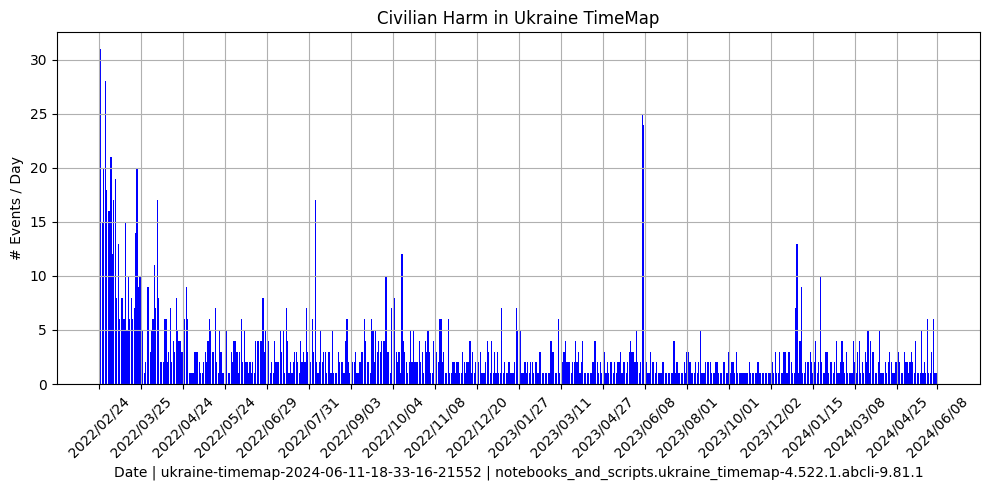

In [7]:
import matplotlib.pyplot as plt

dates = sorted(histogram.keys())
values = [histogram[date] for date in dates]

# Creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(dates, values, color='blue')
plt.xlabel(" | ".join(['Date', object_name, f"{NAME}-{VERSION}.{fullname()}"]))
plt.ylabel('# Events / Day')
plt.title('Civilian Harm in Ukraine TimeMap')

date_count = 20
if len(dates) > date_count:
    selected_dates = [dates[i] for i in range(0, len(dates), len(dates)//date_count)]
    if dates[-1] not in selected_dates:
        selected_dates.append(dates[-1])
else:
    selected_dates = dates
plt.xticks(selected_dates, rotation=45)

plt.tight_layout()
plt.grid(True)

plt.show()

In [8]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/abcli/.abcli/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook
abcli upload

📜 awesome-bash-cli: .env: 24 env var(s)
📜 awesome-bash-cli: abcli/config.env: 13 env var(s)
🔋 gpu: not found.
🚀 abcli-9.81.1.current
📂 object :: ukraine-timemap-2024-06-11-18-33-16-21552


:: ukraine-timemap-2024-06-11-18-33-16-21552 += #built_by_notebook.


confirmed: ukraine-timemap-2024-06-11-18-33-16-21552 does not exist.
ukraine-timemap-2024-06-11-18-33-16-21552 open upload started.
upload: ./abcli.log to s3://kamangir/bolt/ukraine-timemap-2024-06-11-18-33-16-21552/abcli.log
upload: ./ukraine_timemap.json to s3://kamangir/bolt/ukraine-timemap-2024-06-11-18-33-16-21552/ukraine_timemap.json
upload: ./ukraine_timemap.geojson to s3://kamangir/bolt/ukraine-timemap-2024-06-11-18-33-16-21552/ukraine_timemap.geojson


:: ukraine-timemap-2024-06-11-18-33-16-21552 += #open.


In [9]:
# END